# Decision Tree Lab: Building our First Decision Tree

In [223]:
# We will build a Decision Tree Classifier
# The dataset we will be working with contains information about
# -number of wine from portugal
# -along with the rating for the quality of wine lying between 1 to 10

# The model need to be able to predict the score for the wine quality given all the other features in the dataset

In [224]:
# importing the libraries
import pandas as pd
import numpy as np

In [225]:
# Loading the dataset from the csv file into a Pandas dataframe
# winequality-white.csv file is placed in data sub-directory in the workspace

# Even though the file comes with headers, we still specify the 'names for headers' so that they are in our desired format

wine_data = pd.read_csv('data/winequality-white.csv',
                       names=[
            "Fixed Acidity", "Volatile Acidity", "Citric Acid", "Residual Sugar",
            "Chlorides", "Free Sulfur Dioxide", "Total Sulfur Dioxide", "Density",
            "pH", "Sulphates", "Alcohol", "Quality"],
                       skiprows = 1,
                       sep = r'\s*;\s*',
                       engine = 'python')
# The "skiprows=1" attribute says that the first row in the csv file can be skipped i.e. the one containing the confusing headers
# The separator in this csv file is semicolon(;) and not a (,)
# The passing engine is "python" here
wine_data.head()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


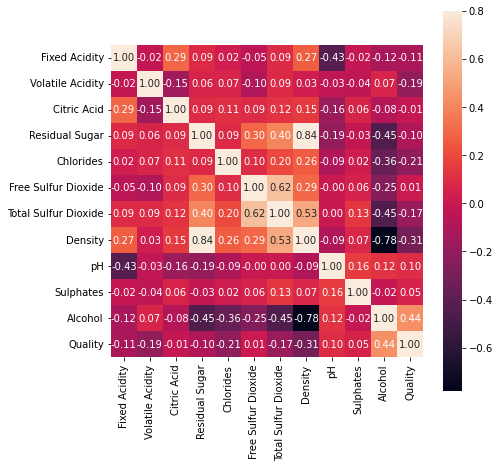

In [226]:
# As all the data in this dataframe is already numeric, so no label encoding is required is required to convert non-numeric values to numerics

# importing the matplotlib and seaborn libraries for plotting a correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = wine_data.corr()
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f')
plt.show()

In [227]:
# Here we can see how all the features correlate to each other in the heatmap
# The Alcohol content is strongly correlated to the quality of wine
# The Density of wine and residual sugar also quite correlated to the quality of wine

# However while building our Decision tree classifier, We shall use all th available features
# Now we will define x variable that includes all the available features(columns in the dataframe) except the 'Quality' of wine
# We will also define y variable with just the labels i.e. 'Quality'

x = wine_data.drop('Quality', axis=1)
y = wine_data['Quality']

In [228]:
# Now we will use train_test_split function in order to split the dataset into a training component and a test component

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# test_size = 0.2 here specifies that 20% of the data will be used for testing

In [229]:
# import the decision tree classifier from SciKit learn library
from sklearn.tree import DecisionTreeClassifier

# We will now decalre our model
# But here we will not specify any parameters
classifier = DecisionTreeClassifier(max_depth = 5, max_features = 4, criterion = 'entropy') 
# 1 note: The decision usually gets gignatic and then it takes longer time to open 
   # To simplify the decision tree, we will specify a max depth for the tree
   # so we will specify a max_depth = 5 before the declaration of classifier
# 2 Further Tweaking specifying max_features attribute in the classifier
# 3 Further Tweaking again, specify the attribute (criterion = 'entropy') 
# Here we can now take our classifier object and see how does our model looks
classifier

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=4)

In [230]:
# A whole bunch of attributes of our model will be displayed
# All of these are default values given that we havent specified any parameters
# The splitting criterion for an attribute is the GINI impurity
# This is because the DecisionTreeClassifier in SciKit learn uses the CART algorithm for decision tree learning

In [231]:
# Training the model usig training data
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=4)

In [232]:
# Testing the accuracy of the model using testdata
# Then print the accuracy score
score = classifier.score(x_test, y_test)
print(score)

0.503061224489796


In [233]:
# The accuracy is nearly around 58% (0.5775510204081633) which is quite good  
# This is because in our dataset, there are 7 different values for the quality of wine & if our model is taking wild guesses, we couldnot get accuracy more than just 14%
# note: 1 accuracy decreases to 51.1% (0.5112244897959184) after changing the max_depyh =5 for classifier
# note: 2 The accuracy decreases a little again further to 50.0% (0.5)after tweaking (specifying max_depth = 4) in the classifier
# note: 3 The accuracy against the test data decreases to 49.0% after specifying thr critrion="entropy" i.e. maximizing the information gain

# Decision Tree Lab: Viewing and Tweaking our Decision Tree

In [234]:
# There are some attributes which we can view to understand how exactly our Decision Tree would works
# .n_features_ can be used for viewing the number of features used in making the Decision Tree 
classifier.n_features_

c:\users\win7\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The attribute `n_features_` is deprecated in 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


11

In [235]:
classifier.n_features_in_

11

In [236]:
# Here we can see that our Decision Tree model has used all the avaiable 11 features

In [237]:
# Viewing the importance of each of the features
classifier.feature_importances_

array([0.        , 0.16962959, 0.06271035, 0.04525862, 0.02123489,
       0.09041625, 0.13269474, 0.01723659, 0.02133101, 0.01464203,
       0.42484592])

In [238]:
# The above array shows that the last feature which is probably the 'Alcohol content' is the most important feature out of all
# We can view the Decision Tree of our model to see all the steps involved and how it actually arrived at a particular prediction

# In order to visualise the Tree, we need to download the tool called graphviz # https://graphviz.gitlab.io/download/
# pip install graphviz in cmd

# Download the latest version of graphiz from site 'http'://www.graphviz.org/download/'
# Run the installer>>Next>>I Agree(agree to the license agreement)>>select (add graphviz to the system path for all users) and click create graphviz desktop icon>>next>>select destination folder>>next>>install>>finish
import sklearn.tree as tree
tree.export_graphviz(classifier, out_file='tree.dot', feature_names=x.columns)

# The above code can be used to output the decision tree into a file called tree.dot

In [239]:
# We will convert the file to tree.png file
from subprocess import call

call(['dot','-T' 'png','tree.dot','-o','tree.png'])
# The above code creates the tree.png file in the same directory as the notebook
# We will navigate to the directory and see the created tree.png file

0

In [240]:
# note: The decision usually gets gignatic and then it takes longer time to open 
# To simplify the decision tree, we will specify a max depth for the tree
# so we will specify a max_depth = 5 before the declaration of classifier
# changing maximum depth
# we get a new decision tree model
# However the accuracy of model decreases to 51.11% after specifying max_depth in the classifier

In [241]:
# However visulaising the Decision Tree becomes easier now
# On Further looking deeper into the PNG file
# Navigating to the root of tree, we can see that the dataset was first split into subsets based on the'Alcohol' content
# Also the one of the subsets in right was further split again using the alcohol content
# The next further splits were donr done using 'Free sulfur dioxide' feature 
# Navigating to the other parts of the tree we see that the 'Alcohol' content was frequently used to split the data

In [242]:
# Tweaking the parameters of our model
# Let's set max_features attribute whic specifies the maximum number of features to consider each time the tree looks to split the data into subsets

In [243]:
# max_features = 4 in classifier
# The accuracy of the new decision tree against the test data decreases a little again further to 50.0% (0.5) after tweaking (specifying max_depth = 4) in the classifier
# The new tree is very different from the previous one
# Infact the root of the tree now uses "Volatile Acidity" to split the data

In [244]:
# Further tweaking the classifier again
# We will specify the attribute (criterion = 'entropy') 
# As The SciKit learn uses the CART algorithm which uses 'gini impurity' as a measure when splitting the data into subsets
# So how can we use 'information gain' instead of 'gini impurity' here?
    #>>This is because the SciKit learn library uses a modified version of CART algorithm
    #>>So we can specify that we want 'information gain' to be maximized at each split
    
# The accuracy against the test data decreases to 49.0% after specifying thr critrion="entropy" i.e. maximizing the information gain
# The root of the new Decision Tree is again 'Alcohol' content